In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import seaborn as sns
import string
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.lines import Line2D

In [2]:
topic_documents = pd.read_csv("BERT_result/distil_document_info_new.csv")
topic_2d = pd.read_csv("BERT_result/distil_embeddings_plot.csv")
topic_result = pd.read_csv("BERT_result/distil_result.csv")

In [3]:
def edge_search(phrase_list, edge_df, col_name):
    for phrase in phrase_list:
        mask = np.column_stack([edge_df[col].str.contains(phrase, na=False) for col in edge_df[[col_name]]])
        phrase_edges = edge_df.loc[mask.any(axis=1)]
        if phrase == phrase_list[0]:
            special_edges = phrase_edges
        else:
            special_edges = pd.concat([special_edges,phrase_edges])
    special_edges = special_edges.drop_duplicates()        
    return special_edges

In [4]:
food_labels = list(edge_search(["food"], topic_result, "Name")["Topic"])
energy_labels = list(edge_search(["energy","fossil"], topic_result, "Name")["Topic"])
redd_labels = list(edge_search(["redd"], topic_result, "Name")["Topic"])

combined_labels = np.concatenate([food_labels,energy_labels])
combined_topic_labels = topic_result[topic_result["Topic"].isin(combined_labels)]["Name"].to_list()
combined_topic_labels

['1_food_agriculture_systems_food systems',
 '2_energy_renewable_renewable energy_clean',
 '19_fossil_fossil fuel_fuel_coal',
 '41_bioenergy_biofuels_biochar_change mitigation',
 '61_nuclear_nuclear energy_nuclear power_power',
 '62_energy_poverty_africa_local']

In [5]:
food_documents = topic_documents[topic_documents["new_topics_ctfidf"].isin(food_labels)]
energy_documents = topic_documents[topic_documents["new_topics_ctfidf"].isin(energy_labels)]
redd_documents = topic_documents[topic_documents["new_topics_ctfidf"].isin(redd_labels)]

food_documents.to_csv("distil_document_info_new_food.csv")
energy_documents.to_csv("distil_document_info_new_energy.csv")
redd_documents.to_csv("distil_document_info_new_redd.csv")

In [33]:
color_dict = {1:"orange",2:"blue", 19:"royalblue", 41:"dodgerblue", 
              61:"steelblue", 62:"skyblue"}
topic_2d["topic"]= topic_documents["Topic"]
topic_2d['color'] = topic_2d["topic"].map(color_dict)
topic_2d['color'] = topic_2d['color'].fillna("lightgray")
topic_2d

,0,1,color,topic
0,13.342000,-1.710082,lightgray,3
1,9.995954,-0.566817,lightgray,31
2,13.281426,-2.866605,lightgray,53
3,7.958268,-5.816249,lightgray,4
4,7.739632,-2.161919,lightgray,21
...,...,...,...,...
4683,9.971929,2.219111,lightgray,28
4684,6.357688,-3.005866,lightgray,0
4685,10.926184,0.593576,lightgray,-1
4686,11.039989,0.329197,lightgray,-1


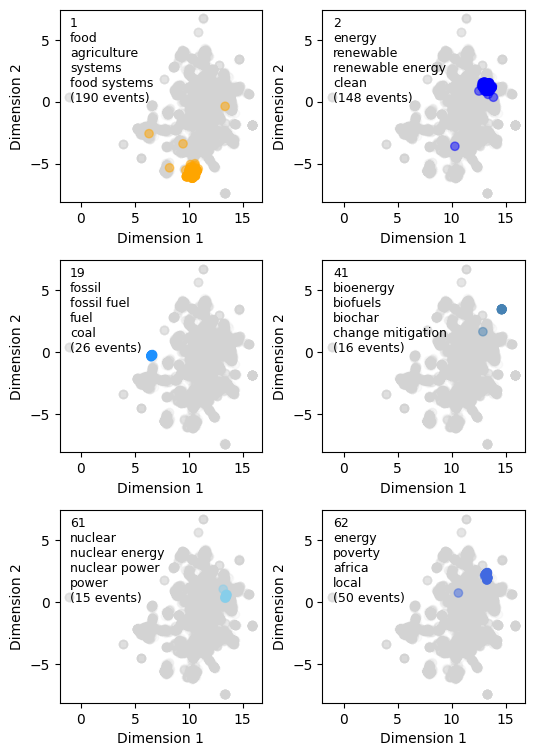

In [78]:
fig, axes = plt.subplots(3,2,figsize=(6,9))
fig.subplots_adjust(wspace=0.3,hspace=0.3)

for i in np.arange(len(combined_labels)):
    t = combined_labels[i]
    this_ax = axes.reshape(-1)[i]
    all_other_topics = topic_2d[topic_2d["topic"]!=t]
    this_ax.scatter(x=all_other_topics["0"],y=all_other_topics["1"],c="lightgray",alpha=0.1)
    this_topic = topic_2d[topic_2d["topic"]==t]
    this_ax.scatter(x=this_topic["0"],y=this_topic["1"],c=this_topic["color"],alpha=0.5)
    this_ax.set_xlabel("Dimension 1")
    this_ax.set_ylabel("Dimension 2")
    text_desc = combined_topic_labels[i].replace("_","\n")+"\n("+str(len(this_topic))+" events)"
    this_ax.text(-1,0,text_desc,fontsize=9)

fig.savefig("plot_distil_documents.png",dpi=600, bbox_inches='tight')